In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [2]:
%run ../../src/matrix_functions.py

# $\mathcal{R}$ is a symbolic Riordan array

In [107]:
m = 8

d_fn, h_fn = Function('d'), Function('h')
d, h = IndexedBase('d'), IndexedBase('h')

d_series = define(let=d_fn(t), be=sum(d[i]*t**i for i in range(m))).subs({d[0]:1})
h_series = define(let=h_fn(t), be=t*sum(h[i]*t**i for i in range(m-1))).expand().subs({h[0]:1})

d_series, h_series

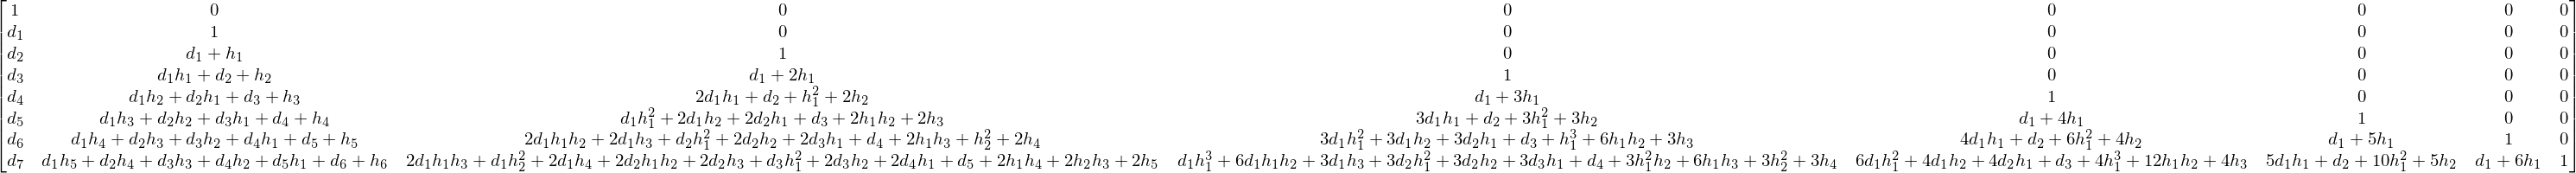

In [108]:
R = Matrix(m, m, riordan_matrix_by_convolution(d_series, h_series, t))
R

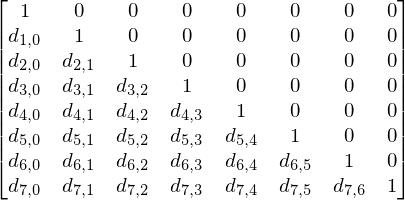

In [68]:
d = IndexedBase('d')
R = Matrix(m, m, lambda n, k: 1 if n==k else d[n,k] if k in range(n+1) else 0)
R

In [109]:
data, eigenvals, multiplicities = eigendata = eigen_data(R)
eigendata

In [110]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

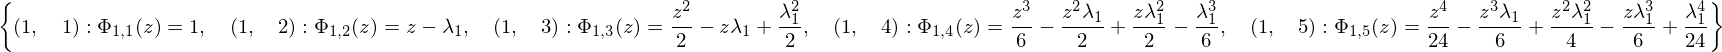

In [94]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

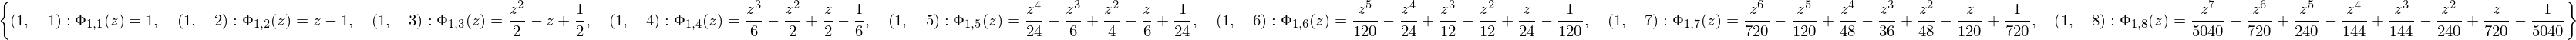

In [10]:
{k:v.subs(eigenvals) for k, v in Phi_polynomials.items()}

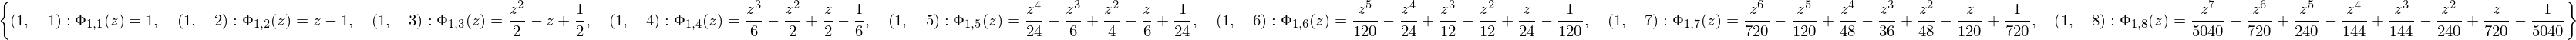

In [111]:
Phi_polynomials = component_polynomials_riordan(degree=m) # actually, degree should be $m-1$
Phi_polynomials

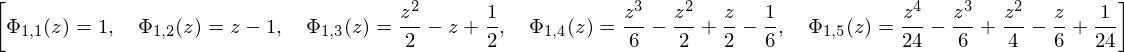

In [96]:
[Phi_polynomials[1,i] for i in range(1, m+1)]

have a look at [A098361][a] in the OEIS:

[a]:http://oeis.org/A098361

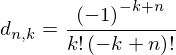

In [51]:
d = IndexedBase('d')
define(let=d[n,k], be=(-1)**(n-k)/(factorial(n-k)*factorial(k)))

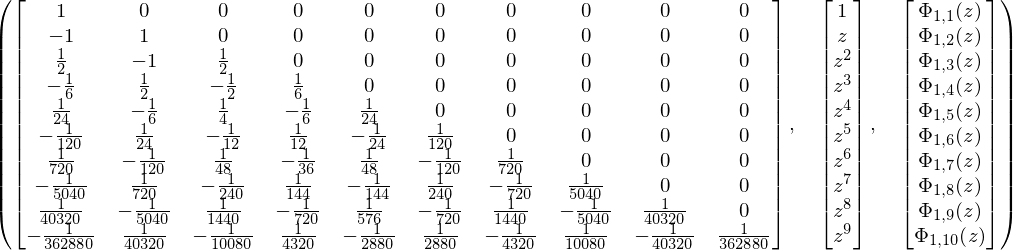

In [56]:
res_ordinary = M_ordinary, z_ordinary, Phi_ordinary = (
    Matrix(m, m, lambda n,k: (-1)**(n-k)/(factorial(n-k)*factorial(k)) if n-k >= 0 else 0),
    Matrix([z**i for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_ordinary

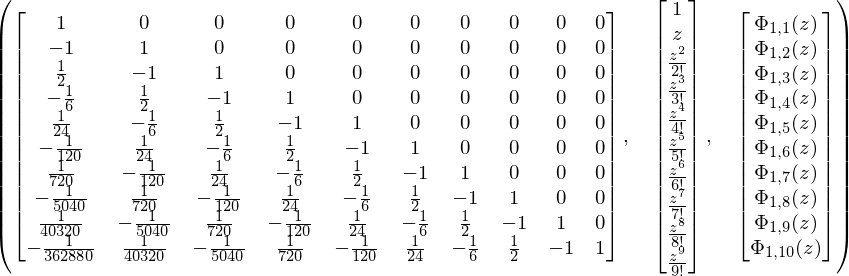

In [57]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(m, m, lambda n,k: (-1)**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(m)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, m+1)]))

res_expt

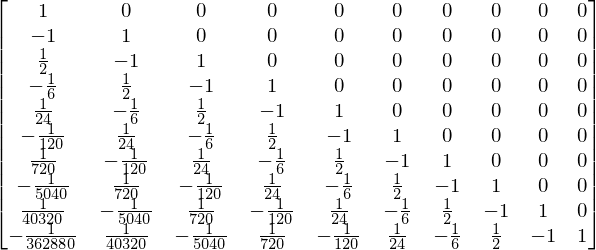

In [58]:
M_expt

In [59]:
Eq(M_ordinary*z_ordinary, M_expt*z_expt).simplify()

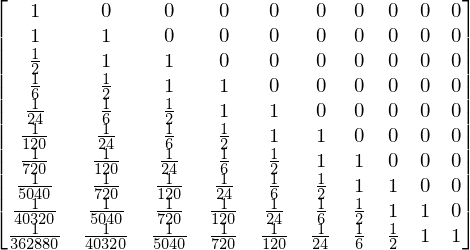

In [60]:
M_expt**(-1)

In [97]:
Z = IndexedBase('Z')

cmatrices = component_matrices(R, Phi_polynomials)
# {Z[k]:v for k,v in cmatrices.items()} # all of them

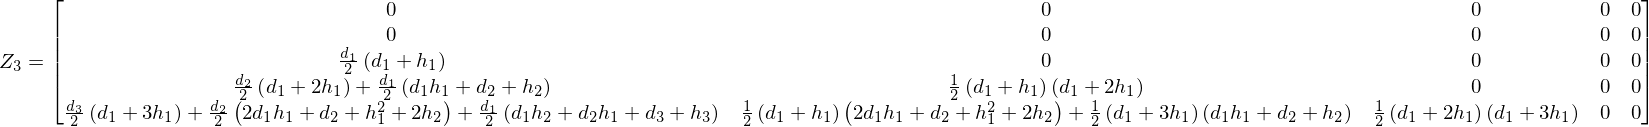

In [98]:
j=3
define(let=Z[j], be=cmatrices[1,j], evaluate=False)

# `inverse` function

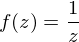

In [61]:
f = Function('f')
f_inverse = define(let=f(z), be=1/z)
f_inverse

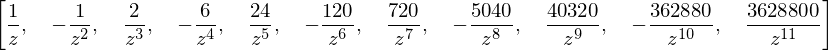

In [62]:
[f_inverse.rhs.diff(z, i) for i in range(11)]

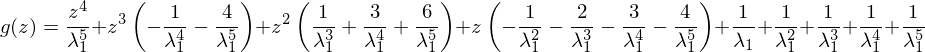

In [99]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [100]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

In [101]:
horner(g_inverse.rhs)

Checks *Equation (1)* in the note:

In [102]:
define(let=Function('g')(z), be=sum(binomial(j-1, k)*(-z)**k for j in range(1, m+1) for k in range(j)))

Checks *Equation (2)* in the note:

In [104]:
define(let=Function('g')(z), be=sum(binomial(m, k+1)*(-z)**(k) for k in range(m)))

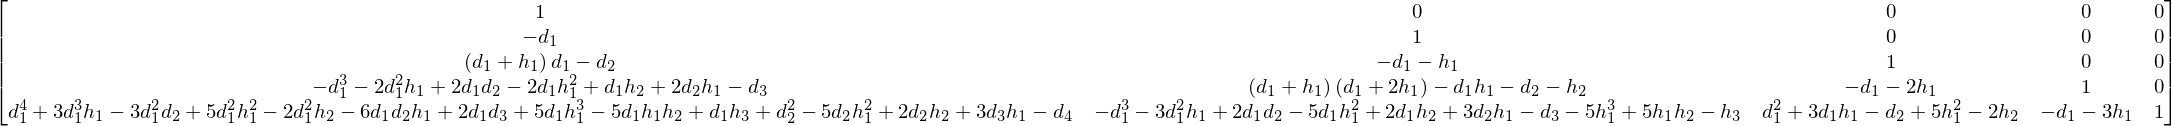

In [105]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    m_inverse = g_inverse(R)
m_inverse

# `power` function

In [106]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

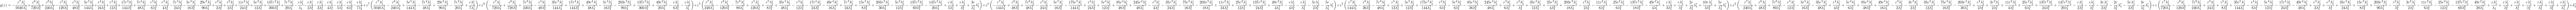

In [112]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power

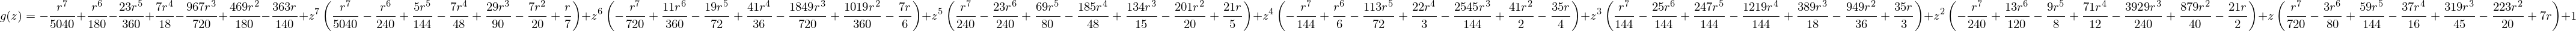

In [113]:
g_power = g_power.subs(eigenvals)
g_power

Checks *Equation (3)* in the note:

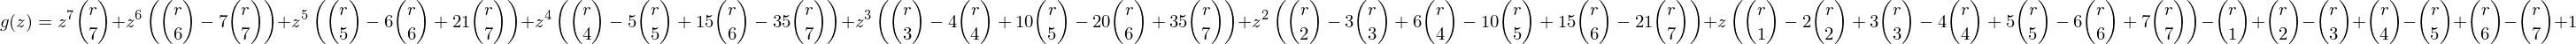

In [136]:
gg = define(let=Function('g')(z), be=sum((-1)**(j-1)*binomial(r, j-1)*binomial(j-1, k)*(-z)**k 
                                    for j in range(1, m+1) 
                                    for k in range(j)).collect(z))
gg

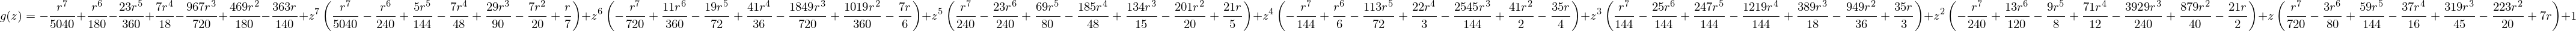

In [137]:
define(let=Function('g')(z), be=gg.rhs.combsimp().collect(z))

In [138]:
Eq(g_power.rhs, gg.rhs).simplify()

Checks *Equation (4)* in the note:

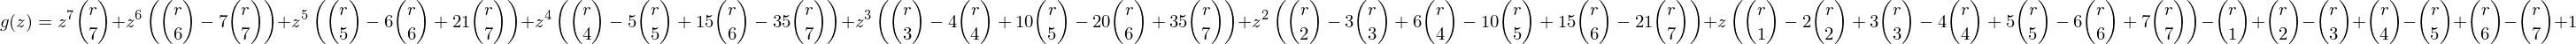

In [139]:
ggg = define(let=Function('g')(z), be=sum((-1)**(j)*binomial(r, j)*binomial(j, k)*(-z)**k 
                                    for k in range(m) 
                                    for j in range(k, m)).collect(z))
ggg

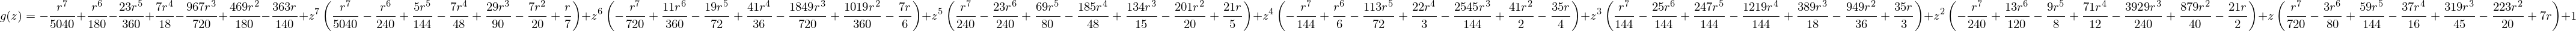

In [140]:
define(let=Function('g')(z), be=ggg.rhs.combsimp().collect(z))

In [141]:
Eq(g_power.rhs, ggg.rhs).simplify()

Checks *Equation (5)* in the note:

In [164]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(r, 8)/ff(r, 8)))
gggg.rhs.combsimp().collect(z)

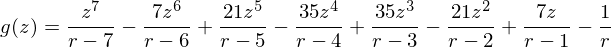

In [173]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(r, 8)))
gggg.expand()#.rhs.combsimp().collect(z)

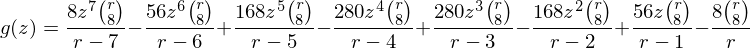

In [168]:
gggg = define(let=Function('g')(z), be=sum((-1)**(m)*(k-m)/(r-k)*binomial(m, k)*binomial(r, m)*(-z)**k 
                                    for k in range(m)).collect(z))
gggg

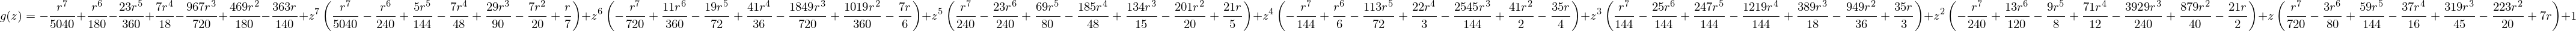

In [169]:
define(let=Function('g')(z), be=gggg.rhs.combsimp().collect(z))

In [170]:
Eq(g_power.rhs, gggg.rhs).simplify()

Checks *Equation (6)* in the note:

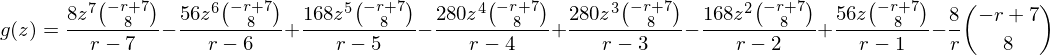

In [180]:
ggggg = define(let=Function('g')(z), be=sum((k-m)/(r-k)*binomial(m, k)*binomial(m-r-1, m)*(-z)**k 
                                    for k in range(m)).collect(z))
ggggg

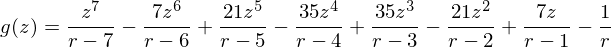

In [179]:
ggggg = define(let=Function('g')(z), be=sum((k-m)/(r-k)*binomial(m, k)*binomial(m-r-1, m)*(-z)**k 
                                    for k in range(m)).collect(z)/(8*binomial(7-r, 8)))
ggggg.expand()

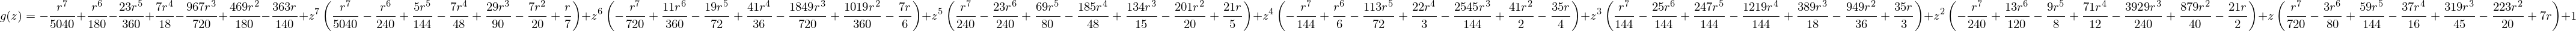

In [181]:
define(let=Function('g')(z), be=ggggg.rhs.combsimp().collect(z))

In [182]:
Eq(g_power.rhs, ggggg.rhs).simplify()

---

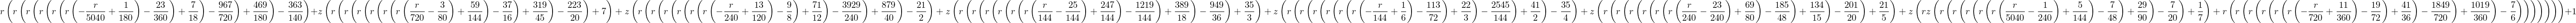

In [118]:
horner(g_power.rhs, wrt=z)

---

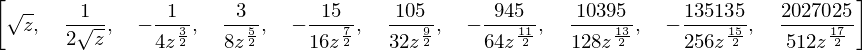

In [30]:
[sqrt(z).diff(z, j) for j in range(10)]

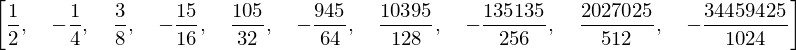

In [31]:
[(-1)**n*factorial(2*(n))/(factorial(n)*2**n)/2**(n+1) for n in range(10)]

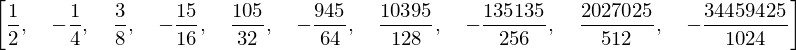

In [32]:
[(-1)**n*factorial(2*(n))/(factorial(n)*4**n)/2 for n in range(10)]

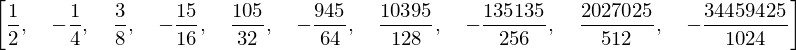

In [33]:
[(-1)**n*binomial(2*n, n)*factorial(n)/(2*4**n) for n in range(10)]

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.